# Cargo librerías



In [43]:
import numpy as np #manejo de arreglos

import matplotlib.pyplot as plt #gráficos

from sklearn.preprocessing import StandardScaler 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  #discriminante lineal

# métricas para evaluar la clasificación predicha
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# otras métricas se pueden ver acá: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

# divide en conjuntos para entrenar y para testeat
from sklearn.model_selection import train_test_split

# Tamaño de gráficos
plt.rcParams["figure.figsize"] = (15,10)

# Levanto datos, train/test split, evaluaciones.

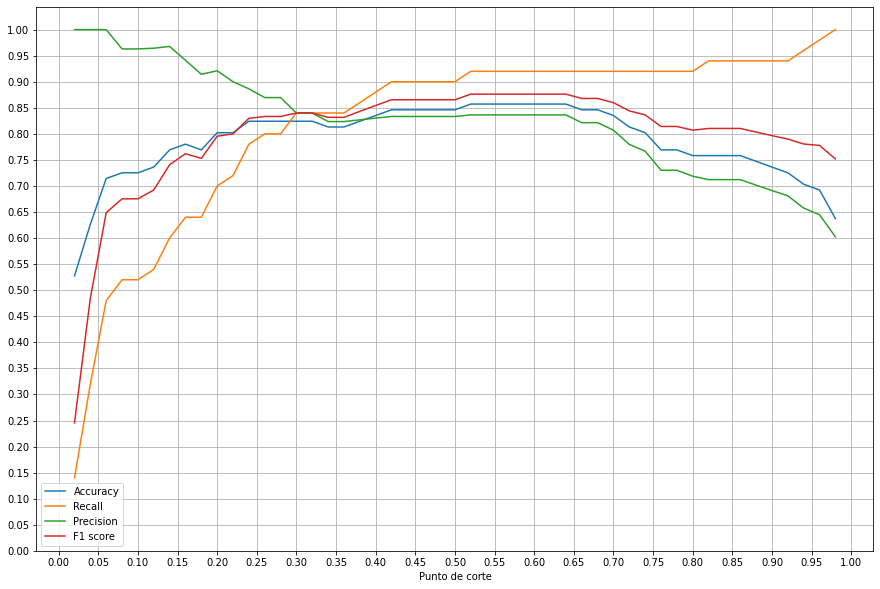

In [46]:
# Levanto los datos
datos = np.loadtxt('./heart.csv',delimiter=',', skiprows=1)#, usecols = (0,2,3,4,5,6,7,8) )
nombres = ['age','sex','cp','rbs','sc','fbs120','recr','mhr','eia','op','slope','ca','thal']

# extraigo variables (predictoras, features, características, son todos nombres que se usan)
X = datos[:,0:-1]
# extraigo clasificación (target, labels, etiquetas, son todos nombres que se usan)
y = datos[:,-1]


# Separo en train/test. El stratify es para conservar el balance de clases.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=474077)

#IMPORTANTE: sigue estando el problema que el split influye mucho en la predicción (recordar encuentro virtual con nros. primos). 
# Para resolver, o mejor dicho amortiguar este efecto, se hace Cross Validation (Validación Cruzada), que por ahora queda en el tintero.
# La solución de compromiso que usamos es fijar el random_state para hacer comparables las métricas entre diferentes corridas.
# De todos modos, puede pensar por su cuenta alguna estrategia para amortiguar el efecto que vimos de la gran variabilidad
# que tiene la predicción dependiendo del split aleatorio que se use.


# Standarizo datos de ENTRENAMIENTO
scaler = StandardScaler()
scaler.fit(X_train) #calcula promedio y desvío
# print("Promedio datos entrenamiento", scaler.mean_)
# print("Varianza datos entrenamiento", scaler.var_)
X_train = scaler.transform(X_train) #estandariza con promedio y desvío anteriores

# Standarizo datos de TESTEO con los mismos promedio y desvío calculados para entrenamiento
X_test = scaler.transform(X_test)
# ¿Por qué hago esto? Porque en teoría los datos de entrenamientos son desconocidos a la hora de entrenar el modelo.


lda = LinearDiscriminantAnalysis() #instancio la clase
#entreno modelo predictivo a partir de los datos de ENTRENAMIENTO
modelo_lda = lda.fit(X_train, y_train)


# predigo probabilidades según el modelo con los datos de TESTEO.
# Luego uso estas probabilidades para, mediante punto de corte, clasificar en clases.
probas = modelo_lda.predict_proba(X_test)


# array con los puntos de corte
puntos_corte = np.arange(0.02, 1, 0.02) # empieza, termina, paso
acc = [] #array donde voy a ir guardando los valore de accuracy para cada punto de corte
recall = [] #ídem para recall
prec = [] #ídem para precision
f1 = [] #íðem para f1 score

# Y TODAS LAS MÉTRICAS QUE SE DESEE: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics


for punto in puntos_corte: #para cada punto de corte

  # calculo las predicciones para ese punto de corte
  y_pred_test_custom = np.ones(y_test.shape)
  for i in range(probas.shape[0]):
      if (probas[i,0]>punto):
          y_pred_test_custom[i]=0.
  
  # calculo las métricas para ese punto de corte y las guardo los arrays antes creados
  acc.append( accuracy_score(y_test, y_pred_test_custom) ) #.append agrega al final del array
  recall.append( recall_score(y_test, y_pred_test_custom) )
  prec.append( precision_score(y_test, y_pred_test_custom) )
  f1.append( f1_score(y_test, y_pred_test_custom) )


# LO QUE SIGUE ES UN GRÁFICO de los valores guardados en los arrays: acc, recall, prec y f1.
# SE PUEDE trabajar directamente con los arrays para sacar más información.
# Por ejemplo: ¿desde cuál punto de corte es el recall mayor al precision?
# Por ejemplo: ¿Cuánto puede aumentar el recall sin afectar el accuracy? Ídem para precision o f1.
# ETC., etc., etc.

plt.plot(puntos_corte, acc, puntos_corte, recall, puntos_corte, prec, puntos_corte, f1)
# plt.xlim(0,1)
# plt.ylim(0.1)
plt.xlabel('Punto de corte')
plt.yticks(np.arange(0,1.05,0.05))
plt.xticks(np.arange(0,1.05,0.05))
plt.grid()
plt.legend(['Accuracy','Recall','Precision','F1 score'])